## Import necessary modules and packages.

In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

### web scraping -> books.toscrape.com

In [28]:
base='https://books.toscrape.com/catalogue/category/books/{}/index.html'
l=['travel_2','mystery_3','historical-fiction_4','sequential-art_5','classics_6','philosophy_7','womens_fiction_9']

with open(r'C:\Users\varun konidina\OneDrive\Desktop\book.csv', encoding='utf-8', mode='w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(['category','Book Name', 'Rating', 'Price'])
  for i in l:
   response = requests.get(base.format(i))
   soup = BeautifulSoup(response.text, 'html.parser')
   category=i.split('_')[0]
   title = soup.find('title')
   course_name = title.get_text().strip().split('|')[0].strip()
   file_name = course_name + '.csv'
   print(file_name)
   travel_books = soup.find_all('article',  attrs = {'class':'product_pod'})
  #  print(travel_books)

   for book in travel_books:
        travel_book_name = book.find('h3').get_text().strip()

        rates = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
        travel_book_rating = rates[book.find('p', attrs={'class': 'star-rating'}).get('class')[1]]

        travel_book_price = book.find('div', attrs={'class': 'product_price'}).find('p', {'class': "price_color"})
        travel_book_price = float(travel_book_price.get_text().split('Â£')[1])

        writer.writerow([category,travel_book_name, travel_book_rating, travel_book_price])

Travel.csv
Mystery.csv
Historical Fiction.csv
Sequential Art.csv
Classics.csv
Philosophy.csv
404 Not Found.csv


## Data visualization with Python (pandas & matplotlib

<class 'pandas.core.series.Series'>
RangeIndex: 101 entries, 0 to 100
Series name: category
Non-Null Count  Dtype 
--------------  ----- 
101 non-null    object
dtypes: object(1)
memory usage: 940.0+ bytes
None
count         101
unique          6
top       mystery
freq           20
Name: category, dtype: object


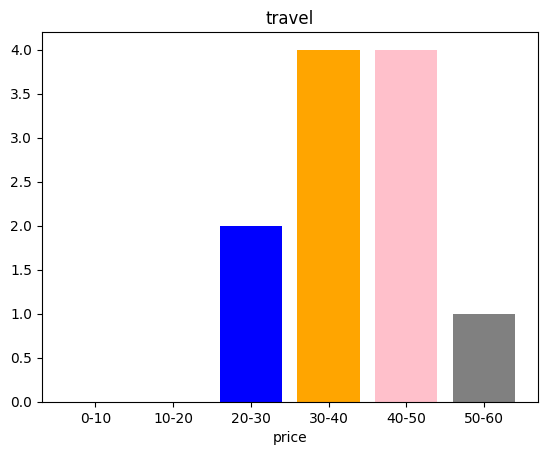

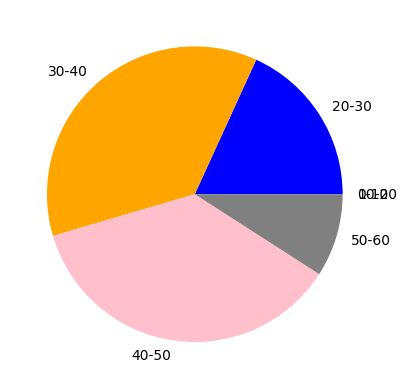

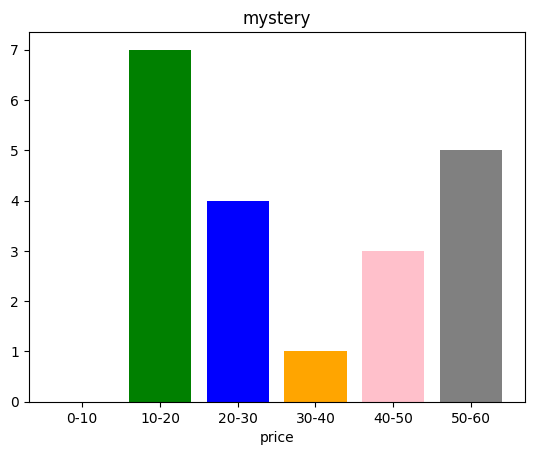

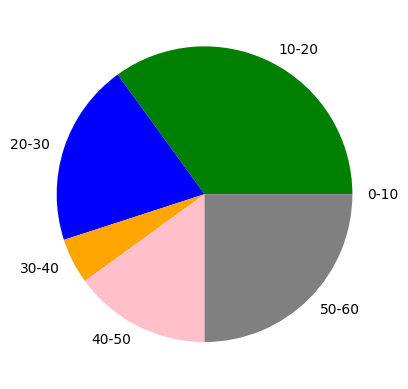

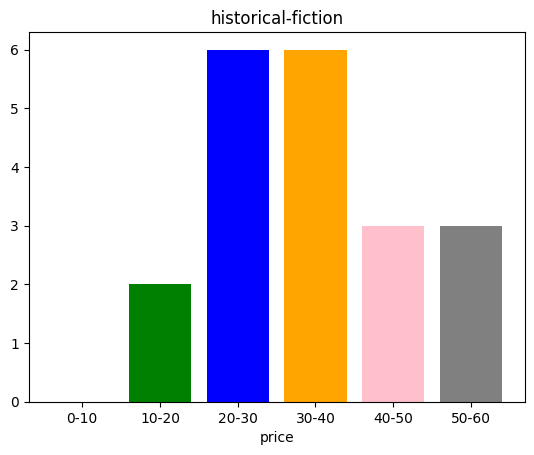

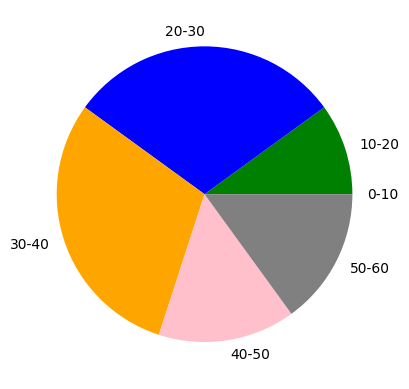

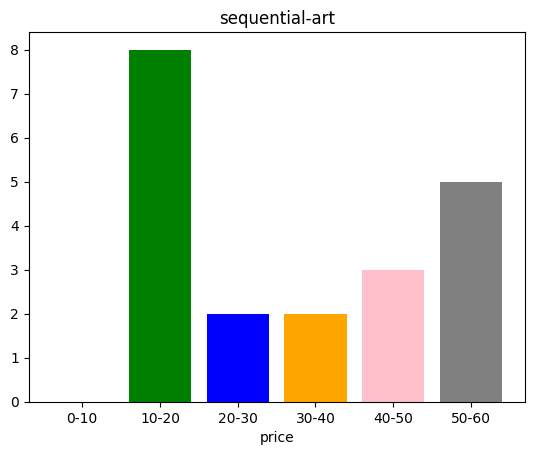

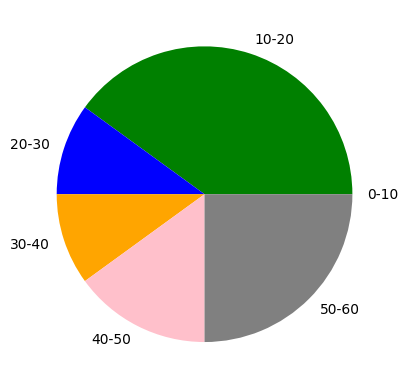

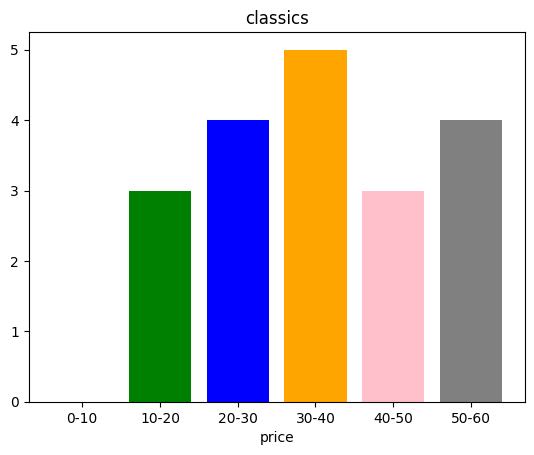

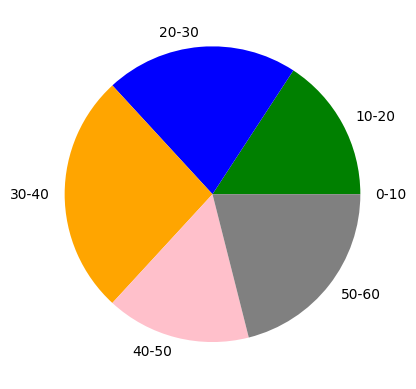

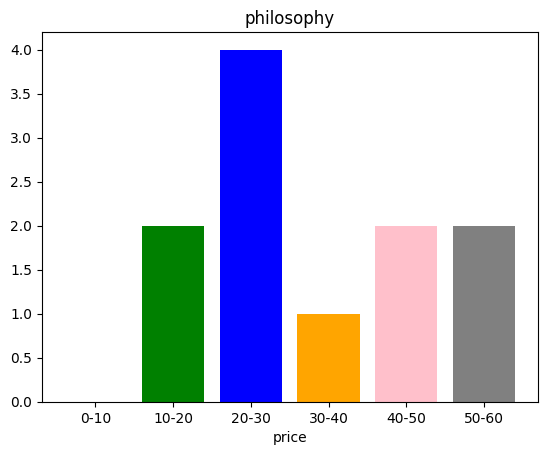

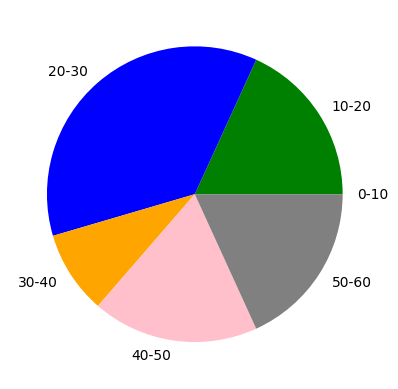

In [4]:
df = pd.read_csv(r'C:\Users\varun konidina\OneDrive\Desktop\book.csv', encoding='utf-8')

print(df['category'].info())
print(df['category'].describe())
myl=['travel','mystery','historical-fiction','sequential-art','classics','philosophy']
def plot_bar(category):
    category_10 = df[(df['category'] == category) & (df['Price'] < 10)]
    category_20 = df[(df['category'] == category) & (df['Price'] > 10) & (df['Price'] < 20)]
    category_30 = df[(df['category'] == category) & (df['Price'] > 20) & (df['Price'] < 30)]
    category_40 = df[(df['category'] == category) & (df['Price'] > 30) & (df['Price'] < 40)]
    category_50 = df[(df['category'] == category) & (df['Price'] > 40) & (df['Price'] < 50)]
    category_60 = df[(df['category'] == category) & (df['Price'] > 50) & (df['Price'] < 60)]
    category1=[category_10['Price'].count(),category_20['Price'].count(),category_30['Price'].count(),category_40['Price'].count(),category_50['Price'].count(),category_60['Price'].count()]
    plt.bar(['0-10','10-20','20-30','30-40','40-50','50-60'],category1,color=['yellow','green','blue','orange','pink','gray']) 
    plt.title(category)
    plt.xlabel('price')
    plt.show()
    plt.pie(category1,labels=['0-10','10-20','20-30','30-40','40-50','50-60'],colors=['yellow','green','blue','orange','pink','gray'])
    plt.show()

for i in myl:
    plot_bar(i) 

# Data visualization with power-BI

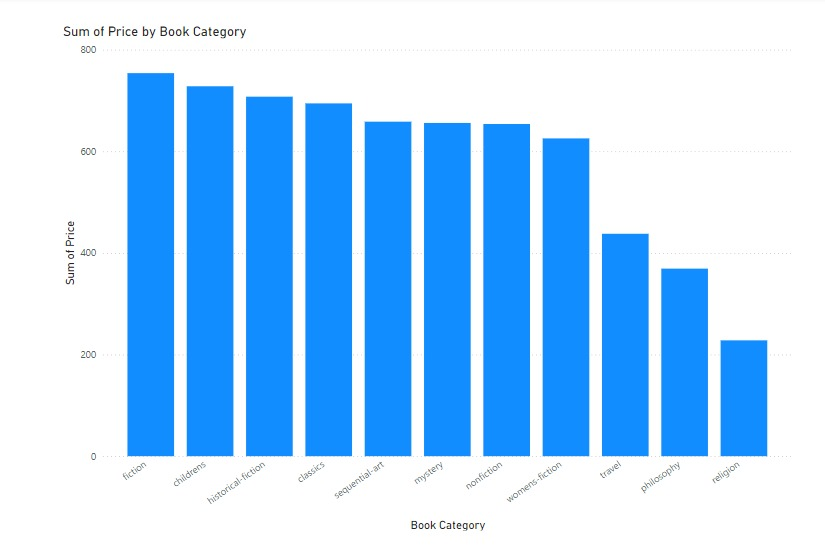

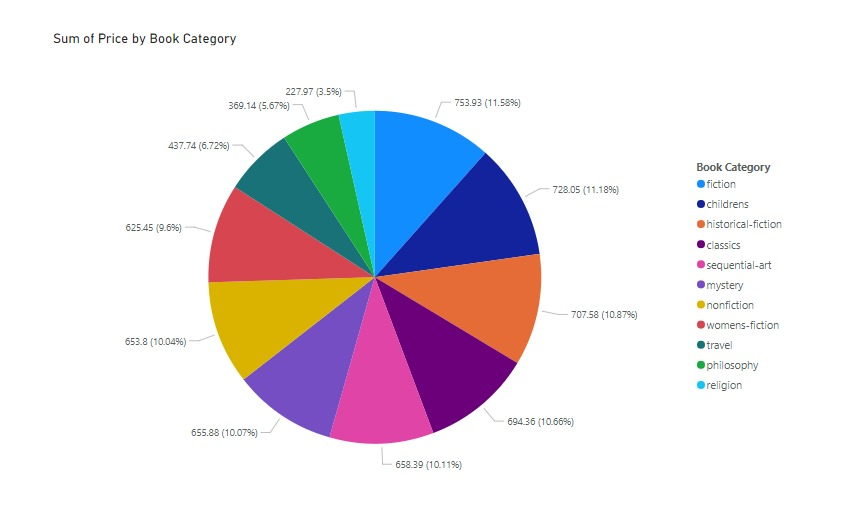

## check data in csv file 

In [12]:
df = pd.read_csv(r'C:\Users\varun konidina\OneDrive\Desktop\book.csv', encoding='utf-8')
df

,category,Book Name,Rating,Price
0,travel,It's Only the Himalayas,2,45.17
1,travel,Full Moon over Noahâs ...,4,49.43
2,travel,See America: A Celebration ...,3,48.87
3,travel,Vagabonding: An Uncommon Guide ...,2,36.94
4,travel,Under the Tuscan Sun,3,37.33
...,...,...,...,...
96,philosophy,Critique of Pure Reason,1,20.75
97,philosophy,"Run, Spot, Run: The ...",1,20.02
98,philosophy,The Nicomachean Ethics,1,36.34
99,philosophy,Meditations,2,25.89


In [15]:
df = pd.read_csv(r'C:\Users\varun konidina\OneDrive\Desktop\book.csv', encoding='utf-8')
encoder = LabelEncoder()
df['category'] = encoder.fit_transform(df['category'])
df['Price'] = df['Price'].astype(int)
x = df.drop(['Book Name','Price'],axis=1)
y = df['Price']
print(x)
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

     category  Rating
0           5       2
1           5       4
2           5       3
3           5       2
4           5       3
..        ...     ...
96          3       1
97          3       1
98          3       1
99          3       2
100         3       1

[101 rows x 2 columns]
0      45
1      49
2      48
3      36
4      37
       ..
96     20
97     20
98     36
99     25
100    43
Name: Price, Length: 101, dtype: int64


# model-1 (LogisticRegression):

In [26]:

model1=LogisticRegression()
model1.fit(x_train,y_train)
print(model1.score(x_test,y_test))
ypredict = model1.predict(x_test)
print("pridicted values sre=",ypredict)
scores = model1.score(x_test,y_test)
print("score=",scores)


0.0
pridicted values sre= [36 32 17 32 17 36 17 56 17 36 36 36 17 56 16 17 17 17 32 17 16]
score= 0.0


# model-2 (Decisiontreeclassifier):

In [27]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
ypredict=model2.predict(x_test)
score2=model2.score(x_test,y_test)
print(f"model_2 score is {score2}")

model_2 score is 0.047619047619047616


# category identifier (Randomforestclassifier):

In [44]:

y = y.to_numpy().ravel()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
model2=RandomForestClassifier()
model2.fit(xtrain,ytrain)
print(model2.score(xtest,ytest))

C:\Users\varun konidina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.23809523809523808
